In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [44]:
data = pd.read_csv(r'.\data\orders_test.csv')

In [45]:
data.shape

(7699, 7)

## data cleaning
### removing nan

In [46]:
def null_percentage(dataframe):
    """ This function outputs total null values in percentage"""
    null_percentage = (dataframe.isna().sum()/dataframe.shape[0]*100)
    return null_percentage

null_percentage(data)


Name                  0.000000
Email                 9.767502
Financial Status     37.160670
Paid at              37.511365
Fulfilled at         37.719184
Accepts Marketing    37.160670
Total                37.160670
dtype: float64

* *filtering out Financial Status with refunded values as it is not considered in sales forecasting*

In [47]:
data = data.drop(data[data['Financial Status'] == 'refunded'].index)

In [48]:
data = [data['Paid at'],data['Total']]
sales = pd.concat(data, axis = 1)
sales.shape

(7679, 2)

In [49]:
sales.dropna(subset=['Total','Paid at'], inplace=True)

In [50]:
sales.shape

(4791, 2)

In [51]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4791 entries, 0 to 7698
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Paid at  4791 non-null   object 
 1   Total    4791 non-null   float64
dtypes: float64(1), object(1)
memory usage: 112.3+ KB


### stripping datetime to weeks, months and days

In [52]:
sales.head()

,Paid at,Total
0,2022-02-10 13:04:53 +0530,579.0
1,2022-02-10 13:02:37 +0530,849.0
2,2022-02-10 11:51:18 +0530,650.0
3,2022-02-10 11:19:38 +0530,650.0
4,2022-02-10 10:51:21 +0530,579.0


In [53]:
sales['Paid at'] = pd.to_datetime(sales['Paid at'])

In [54]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4791 entries, 0 to 7698
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                                
---  ------   --------------  -----                                
 0   Paid at  4791 non-null   datetime64[ns, pytz.FixedOffset(330)]
 1   Total    4791 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(1)
memory usage: 112.3 KB


In [55]:
sales['year'] = sales['Paid at'].dt.year

In [56]:
sales.head()

,Paid at,Total,year
0,2022-02-10 13:04:53+05:30,579.0,2022
1,2022-02-10 13:02:37+05:30,849.0,2022
2,2022-02-10 11:51:18+05:30,650.0,2022
3,2022-02-10 11:19:38+05:30,650.0,2022
4,2022-02-10 10:51:21+05:30,579.0,2022


In [57]:
sales['month'] = sales['Paid at'].dt.month

In [58]:
sales['week'] = sales['Paid at'].dt.week

C:\Users\Asus\AppData\Local\Temp\ipykernel_18724\2210335062.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  sales['week'] = sales['Paid at'].dt.week


In [59]:
sales.head()

,Paid at,Total,year,month,week
0,2022-02-10 13:04:53+05:30,579.0,2022,2,6
1,2022-02-10 13:02:37+05:30,849.0,2022,2,6
2,2022-02-10 11:51:18+05:30,650.0,2022,2,6
3,2022-02-10 11:19:38+05:30,650.0,2022,2,6
4,2022-02-10 10:51:21+05:30,579.0,2022,2,6


In [60]:
sales['days'] = sales['Paid at'].dt.day

In [61]:
sales.head()

,Paid at,Total,year,month,week,days
0,2022-02-10 13:04:53+05:30,579.0,2022,2,6,10
1,2022-02-10 13:02:37+05:30,849.0,2022,2,6,10
2,2022-02-10 11:51:18+05:30,650.0,2022,2,6,10
3,2022-02-10 11:19:38+05:30,650.0,2022,2,6,10
4,2022-02-10 10:51:21+05:30,579.0,2022,2,6,10


In [62]:
tot = sales['Total'].sum()

In [63]:
tot

4376371.16

In [64]:
sales['date'] = sales['Paid at'].dt.date

In [65]:
sales.head()

,Paid at,Total,year,month,week,days,date
0,2022-02-10 13:04:53+05:30,579.0,2022,2,6,10,2022-02-10
1,2022-02-10 13:02:37+05:30,849.0,2022,2,6,10,2022-02-10
2,2022-02-10 11:51:18+05:30,650.0,2022,2,6,10,2022-02-10
3,2022-02-10 11:19:38+05:30,650.0,2022,2,6,10,2022-02-10
4,2022-02-10 10:51:21+05:30,579.0,2022,2,6,10,2022-02-10


In [66]:
# reverse the dataframe
sales_TS = sales.iloc[::-1]
#sales_TS.head(20)

In [67]:
#weekley group by based on year and week
weekley_groupby = sales_TS.groupby(by =['year','week']).sum()
weekley_groupby = pd.DataFrame(weekley_groupby)
weekley_groupby.reset_index(inplace=True)
weekley_groupby.drop(['month','days'], axis = 1, inplace = True)
weekley_groupby.head(5)

,year,week,Total
0,2020,41,2230.0
1,2020,42,11870.0
2,2020,43,7046.0
3,2020,44,19222.0
4,2020,45,92197.0


In [68]:
weekley_groupby.Total.sum()

4376371.16

In [69]:
# adding a weeks col which contains continous week numbers 
weekley_groupby['weeks'] = np.arange(len(weekley_groupby))
weekley_groupby['weeks'] = weekley_groupby['weeks'] +1 
weekley_groupby.head()


,year,week,Total,weeks
0,2020,41,2230.0,1
1,2020,42,11870.0,2
2,2020,43,7046.0,3
3,2020,44,19222.0,4
4,2020,45,92197.0,5


In [70]:
#sales_TS.to_csv('./data/sales.csv')

In [71]:
daily_groupby = sales_TS.groupby(by = ['date'])['Total'].sum()
daily_groupby = pd.DataFrame(daily_groupby)
daily_groupby.reset_index(inplace = True)
daily_groupby.head()

,date,Total
0,2020-10-05,310.0
1,2020-10-11,1920.0
2,2020-10-12,350.0
3,2020-10-13,7380.0
4,2020-10-15,4140.0


In [72]:
daily_groupby['Total'].sum()

4376371.16

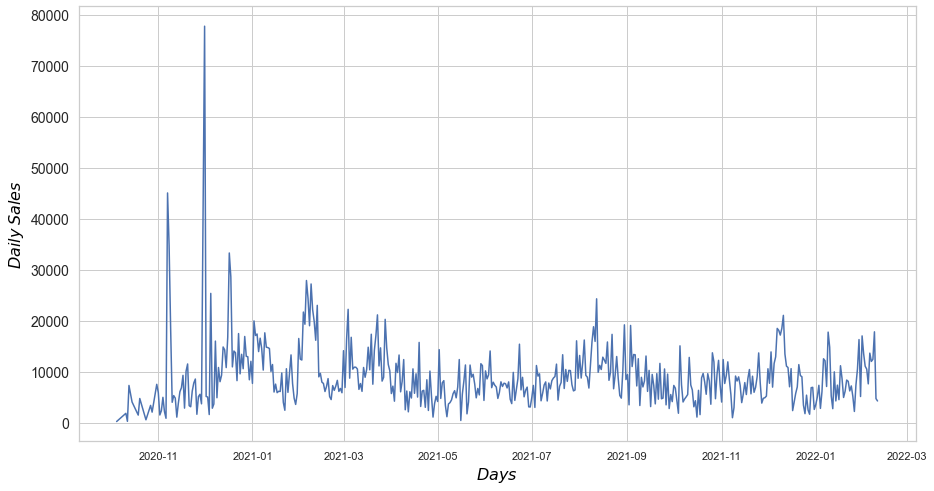

In [73]:
sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

sns.lineplot(x = daily_groupby['date'], y = daily_groupby['Total'], markers= '*', ax = ax )
plt.xlabel(r'$Days$', fontdict = font)
plt.ylabel(r'$Daily _ Sales$ ', fontdict = font)
plt.yticks(fontsize = 14)
plt.show()

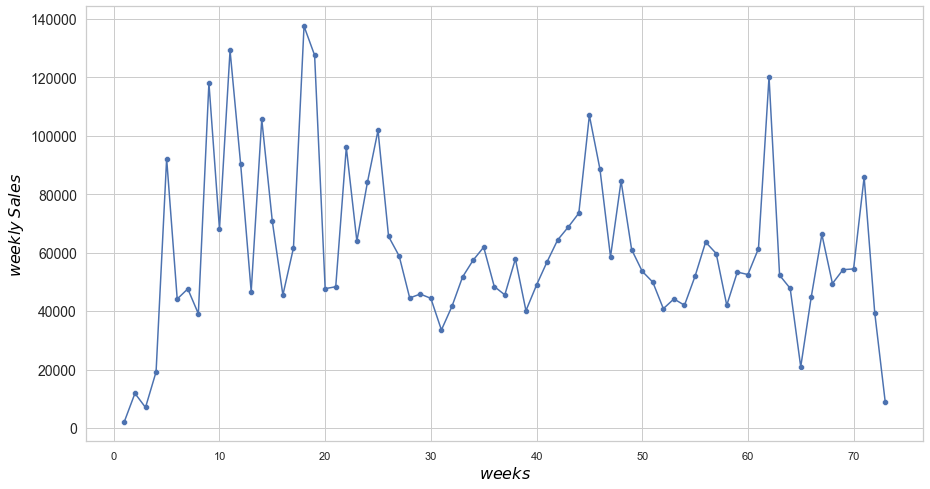

In [74]:

sns.set_theme(context='notebook',
    style="whitegrid",
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None)
fig_dims = (15,8 )
fig, ax = plt.subplots(figsize=fig_dims)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

sns.lineplot(x = weekley_groupby['weeks'], y = weekley_groupby['Total'], ax = ax )
sns.scatterplot(x = weekley_groupby['weeks'], y = weekley_groupby['Total'], markers= '*', ax = ax )
plt.xlabel(r'$weeks$', fontdict = font)
plt.ylabel(r'$weekly _ Sales$ ', fontdict = font)
plt.yticks(fontsize = 14)
plt.show()


## .csv file from instagram sales

In [75]:
data_insta = pd.read_csv(r'./data/Order Sheet_insta.csv')
data_insta.head()

,Date,Bill #,Customer Name,Product Name,Black,Brown,Blue,Cherry,Dark Grey,Marron,...,Account,Source,City,Partner,Dispatched,Status,Comments,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,24/08/2019,NaN,Kaveri,Mens Wallet,-,-,-,-,-,-,...,Hayden,Ankit,Bangalore,DTDC,YES,COMPLETE,-,NaN,NaN,NaN
1,24/08/2019,NaN,Kaveri,3 Fold Wallet,-,-,1,1,-,-,...,Hayden,Ankit,Bangalore,DTDC,YES,COMPLETE,-,NaN,NaN,NaN
2,26/08/2019,NaN,Yash,Flap Card Holder,-,-,-,-,-,-,...,Hayden,Ankit,Pune,TrackOn,YES,COMPLETE,-,NaN,NaN,NaN
3,26/08/2019,NaN,Yash,Travel Kit,-,-,-,-,-,-,...,Hayden,Ankit,Pune,TrackOn,YES,COMPLETE,-,NaN,NaN,NaN
4,26/08/2019,NaN,Yash,Sunglass Case,-,-,-,-,-,-,...,Hayden,Ankit,Pune,TrackOn,YES,COMPLETE,-,NaN,NaN,NaN


In [76]:
data_insta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           771 non-null    object 
 1   Bill #         715 non-null    float64
 2   Customer Name  771 non-null    object 
 3   Product Name   771 non-null    object 
 4   Black          787 non-null    object 
 5   Brown          787 non-null    object 
 6   Blue           787 non-null    object 
 7   Cherry         787 non-null    object 
 8   Dark Grey      787 non-null    object 
 9   Marron         786 non-null    object 
 10  Peach          787 non-null    object 
 11  Grey           787 non-null    object 
 12  Skyblue        787 non-null    object 
 13  Orange         787 non-null    object 
 14  Tan            786 non-null    object 
 15  Charcoal       787 non-null    object 
 16  Green          771 non-null    object 
 17  Coral          771 non-null    object 
 18  Old-Maroon

In [77]:
data_insta = data_insta[['Date','Bill Amount']]

In [79]:
data_insta.dropna(inplace =True)

In [80]:
data_insta.head()

,Date,Bill Amount
0,24/08/2019,1200.0
1,24/08/2019,1300.0
2,26/08/2019,2200.0
3,26/08/2019,500.0
4,26/08/2019,300.0


In [81]:
data_insta.to_csv('./data/data_insta.csv')